In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


### Step 0 : Prepare data

In [2]:
X_numpy,y_numpy = datasets.make_regression(
    n_samples=100,n_features=1,
    noise=20,random_state=1
)

In [3]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [6]:
y.size()

torch.Size([100])

In [7]:
y = y.view(y.shape[0],1)

In [9]:
n_samples,n_features = X.shape

### 1.Model

In [10]:
input_size = n_features
output_size = 1  # 1 output for each sample

In [11]:
model = nn.Linear(input_size,output_size)

### 2.Loss and Optimiser

In [12]:
learning_rate = 0.01
criterion = nn.MSELoss()

optimiser = torch.optim.SGD(model.parameters(),lr=learning_rate)

### 3.Training loop

In [13]:
num_epochs = 100

In [14]:
for epoch in range(num_epochs):
    
    #forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred,y)
    
    #backward pass
    loss.backward()
    
    #update
    optimiser.step()
    
    optimiser.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch : {epoch+1},loss : {loss.item():.4f}')

epoch : 10,loss : 4355.3340
epoch : 20,loss : 3248.1968
epoch : 30,loss : 2447.7537
epoch : 40,loss : 1868.3938
epoch : 50,loss : 1448.6176
epoch : 60,loss : 1144.1737
epoch : 70,loss : 923.1783
epoch : 80,loss : 762.6259
epoch : 90,loss : 645.8971
epoch : 100,loss : 560.9708


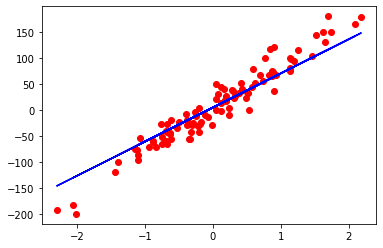

In [15]:
# plot

predicted = model(X).detach().numpy()

plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')

